In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

In [ ]:
dataset_path = '/content/drive/MyDrive/PyLearn/Datasets/5Animals'

image_data_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=.2
)

train_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    # save_to_dir='/content/drive/MyDrive/PyLearn/Datasets/Animal augmented data'
)

validation_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation'
)

Found 1052 images belonging to 5 classes.
Found 262 images belonging to 5 classes.


In [ ]:
model = Sequential([
    Input(shape=(256, 256, 3)),

    Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation=relu),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation=relu),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(.5),

    Dense(128, activation=relu),
    Dense(5, activation=softmax)
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=.001),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
train_result = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 433s 13s/step - accuracy: 0.1956 - loss: 1.8028 - val_accuracy: 0.3015 - val_loss: 1.5515
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.3182 - loss: 1.5306 - val_accuracy: 0.4084 - val_loss: 1.3726
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.4066 - loss: 1.3846 - val_accuracy: 0.4542 - val_loss: 1.2283
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.4512 - loss: 1.2492 - val_accuracy: 0.4084 - val_loss: 1.2853
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.4813 - loss: 1.2388 - val_accuracy: 0.4847 - val_loss: 1.1477
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5252 - loss: 1.1199 - val_accuracy: 0.5191 - val_loss: 1.1783
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5789 - loss: 1.0356 - val_accuracy: 0.4962 - val_loss: 1.1794
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5476 - loss: 1.0099 - val_accuracy: 0.5954 - val_los

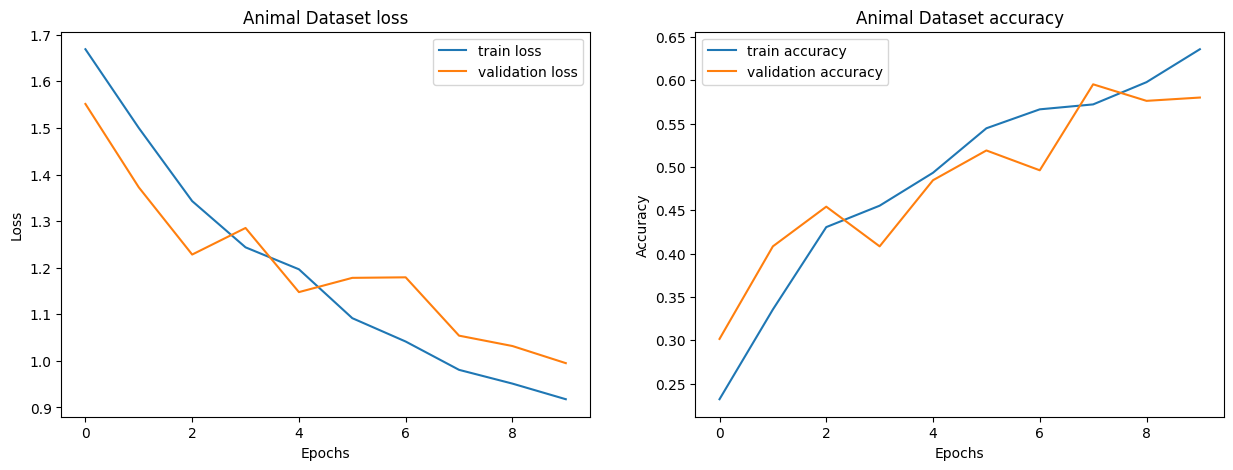

In [ ]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

ax_1.plot(train_result.history['loss'], label='train loss')
ax_1.plot(train_result.history['val_loss'], label='validation loss')
ax_1.legend()
ax_1.set_title('Animal Dataset loss')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Loss')

ax_2.plot(train_result.history['accuracy'], label='train accuracy')
ax_2.plot(train_result.history['val_accuracy'], label='validation accuracy')
ax_2.legend()
ax_2.set_title('Animal Dataset accuracy')
ax_2.set_xlabel('Epochs')
ax_2.set_ylabel('Accuracy')

plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


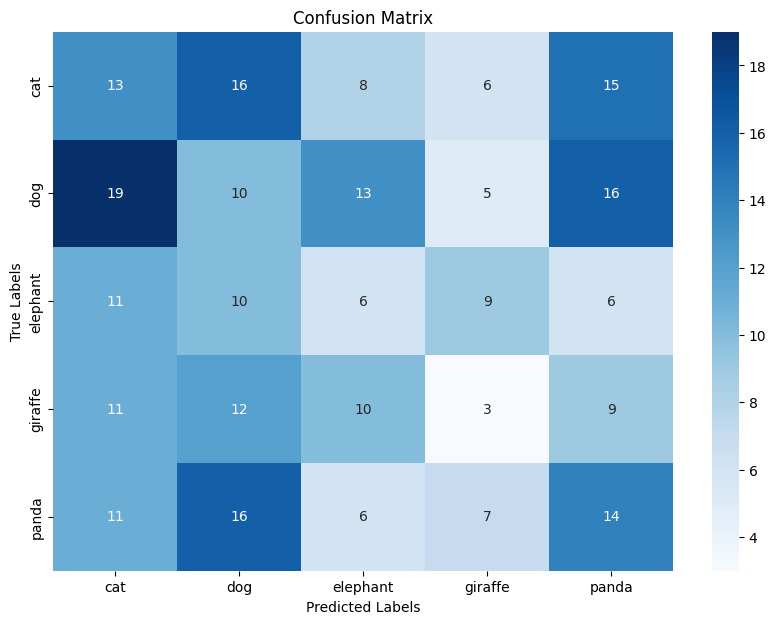

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

validation_labels = validation_dataset.classes
predictions = model.predict(validation_dataset)

predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(validation_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_dataset.class_indices.keys(), yticklabels=validation_dataset.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, img_path, class_indices, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0

    predictions = model.predict(img_array)

    predicted_class = np.argmax(predictions, axis=1)

    plt.imshow(img)
    plt.show()

    predicted_class_name = list(class_indices.keys())[predicted_class[0]]
    print(f"Predicted class: {predicted_class[0]} ({predicted_class_name})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


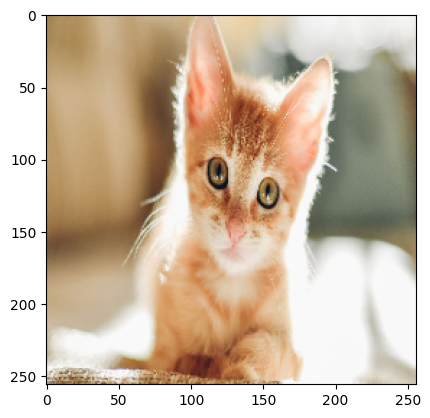

Predicted class: 1 (dog)


In [ ]:
img_path = '/content/drive/MyDrive/PyLearn/Datasets/5Animals/cat/29a3a142bc3e0b9e4b150f4be030cf46.jpg'
predict_image(model, img_path, class_indices=train_dataset.class_indices)